In [1]:

from sklearn.datasets import load_files
from glob import glob
import cv2
import os
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Flatten, MaxPooling2D, Dropout,Dense
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def load_my_files(filename):
    data=load_files(filename)   #For loading the files  ImageClassificationData/Train
    print(list(data.target_names))
    target_names=list(data.target_names)

    data_category_files=np.array(data['filenames'])  #for making an array of file names
    print(data_category_files)
    print(len(data_category_files))

    data_categories_target=np_utils.to_categorical(np.array(data['target']),7) #for one hot encoding of files
    print(data_categories_target)
    return data_category_files,data_categories_target,target_names

In [3]:
train_files, train_targets,target_names=load_my_files('ImageClassificationData/Train')

['Customer Area', 'Gas_Station', 'Inventory', 'Office_Space', 'POS', 'Road_Signage', 'Shop_outdoor']
['ImageClassificationData/Train\\Gas_Station\\43529082.jpg'
 'ImageClassificationData/Train\\POS\\43338444.jpg'
 'ImageClassificationData/Train\\Customer Area\\43441392.jpg'
 'ImageClassificationData/Train\\POS\\43369435.jpg'
 'ImageClassificationData/Train\\Road_Signage\\43566365.jpg'
 'ImageClassificationData/Train\\Office_Space\\43327196.jpg'
 'ImageClassificationData/Train\\Gas_Station\\43335894.jpg'
 'ImageClassificationData/Train\\Shop_outdoor\\43357921.jpg'
 'ImageClassificationData/Train\\Office_Space\\43431175.jpg'
 'ImageClassificationData/Train\\Office_Space\\43327193.jpg'
 'ImageClassificationData/Train\\POS\\43431184.jpg'
 'ImageClassificationData/Train\\Shop_outdoor\\43348478.jpg'
 'ImageClassificationData/Train\\Office_Space\\43335334.jpg'
 'ImageClassificationData/Train\\Customer Area\\43685940.jpg'
 'ImageClassificationData/Train\\Customer Area\\43523655.jpg'
 'ImageCla

In [4]:
len(train_files)

105

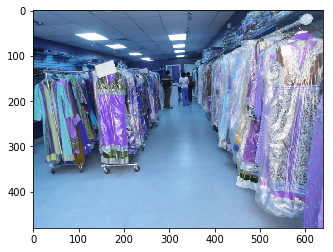

In [5]:
image=cv2.imread(train_files[15])
plt.imshow(image)

In [6]:
image.shape

(480, 640, 3)

In [7]:
datagen= ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [8]:
ig=img_to_array(image)

In [9]:
ig= ig.reshape((1,) + ig.shape) 

In [10]:
model=Sequential()

In [11]:
model.add(Conv2D(32,(3,3),input_shape=(480,640,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [13]:
batch_size=3

In [35]:
train_generator = datagen.flow_from_directory('ImageClassificationData/Train',  target_size=(480, 640), batch_size=batch_size,
        class_mode='categorical')

Found 105 images belonging to 7 classes.


In [14]:
validation_generator= datagen.flow_from_directory( 'ImageClassificationData/Valid',  target_size=(480, 640),  batch_size=batch_size,
        class_mode='categorical')

Found 10 images belonging to 7 classes.


In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size
)
model.save_weights('first_try.h5') 

Epoch 1/50
400/400 [==============================] - 3992s 10s/step - loss: 1.9836 - acc: 0.2170
Epoch 2/50
179/400 [============>.................] - ETA: 31:25 - loss: 1.7350 - acc: 0.3151